In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pylab as plt
import json
import os
s = json.load(open(os.getenv('PUI2015')+'/nk1877.json'));
plt.rcParams.update(s)
#import Psycopg
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/nikhilkishore/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
`%matplotlib` prevents importing * from pylab and numpy


In [3]:
delhi = gpd.read_file("delhi.geojson")

In [4]:
delhi.shape

(292, 7)

In [5]:
delhi.head(2)

,geometry,latitude,longitude,ward,wardno,zone,zoneno
0,"POLYGON ((77.088649 28.874501, 77.090601000000...",28.874501,77.088649,Narela,1,Narela,7
1,"POLYGON ((77.0574 28.820391, 77.056916 28.8205...",28.820391,77.057400,Bankner,2,Narela,7


In [6]:

google_maps_key='XXXXXXXX'

In [7]:
air=pd.read_csv("Data/cpcb_dly_aq_delhi-2015.csv")

In [8]:
air.shape

(744, 11)

In [10]:
air.head(2)

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,55,05-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4,44,203,NaN
1,55,08-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4,45,214,NaN


In [11]:
import urllib2
import json
def locfinder(x):
    if(x!=0):
        url ='https://maps.googleapis.com/maps/api/geocode/json?address=%s&key=%s'%(x.strip().replace(' ', '+'),\
                                                                                google_maps_key)
        request = urllib2.urlopen(url)
        data = json.load(request)
        if data['status']=="OVER_QUERY_LIMIT":
            return 0
        elif data['status']=="OK":
             return (data['results'][0]['geometry']['location']['lat'],data['results'][0]['geometry']['location']['lng'])
        else:
            pass

In [12]:
loc=air['Location of Monitoring Station'].apply(locfinder)

In [13]:
air['latitude'] = map(lambda x: x[0],loc)
air['longitude'] = map(lambda x:x[1],loc)

In [14]:
air#.groupby('Location of Monitoring Station').sum()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5,latitude,longitude
0,55,05-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4,44,203,NaN,28.546001,77.246421
1,55,08-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4,45,214,NaN,28.546001,77.246421
2,55,13-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4,47,182,NaN,28.546001,77.246421
3,55,16-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4,43,204,78,28.546001,77.246421
4,55,21-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4,39,192,83,28.546001,77.246421
5,55,27-01-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4,46,159,146,28.546001,77.246421
6,55,02-02-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4,41,267,62,28.546001,77.246421
7,55,05-02-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4,50,235,112,28.546001,77.246421
8,55,10-02-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4,48,241,62,28.546001,77.246421
9,55,13-02-15,Delhi,Delhi,"Nizamuddin, Delhi",Central Pollution Control Board,"Residential, Rural and other Areas",4,45,280,NaN,28.546001,77.246421


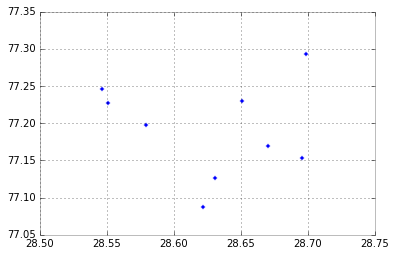

In [16]:
plt.scatter(air['latitude'],air['longitude'])

In [21]:
air1=pd.read_csv("Data/Table_33.11_Y2015.csv")

In [22]:
air1

,State,2009 - SO2,2009 - NO2,2009 - PM,2010 - SO2,2010 - NO2,2010 - PM,2011 - SO2,2011 - NO2,2011 - PM,2012 - SO2,2012 - NO2,2012 - PM
0,Andhra Pradesh,7,20,86,5,17,73,7,19.0,77,7,18,72
1,Assam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,13,72
2,Bihar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,36,166
3,Chandigarh,2,15,81,2,16,92,2,16.0,102,2,19,110
4,Chhattisgarh,16,31,164,11,22,107,12,27.0,173,11,26,151
5,Dadra & Nagar Haveli,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,20,NaN
6,Daman & Diu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,20,NaN
7,Delhi,6,50,252,5,55,261,5,57.0,222,5,59,237
8,Goa,3,14,74,14,18,68,10,18.0,100,11,17,96
9,Gujarat,16,24,92,15,23,89,15,25.0,88,15,26,94


In [24]:
from ClassGeo import LatlonPointer

In [25]:
def ctlocate(x):
    k=LatlonPointer()
    k.lat,k.lon= x.latitude,x.longitude
    k.shapefile = delhi
    return k.finder("ward")

In [26]:
wart=air.apply(ctlocate,1)

In [28]:
air['ward']=wart

In [30]:
air.columns

Index([u'Stn Code', u'Sampling Date', u'State', u'City/Town/Village/Area',
       u'Location of Monitoring Station', u'Agency', u'Type of Location',
       u'SO2', u'NO2', u'RSPM/PM10', u'PM 2.5', u'loc', u'latitude',
       u'longitude', u'ward'],
      dtype='object')

In [31]:
a2=air[[u'SO2', u'NO2', u'RSPM/PM10', u'PM 2.5',u'ward']]

In [40]:
final=(a2.groupby('ward').mean()).reset_index()

In [46]:
final1=delhi.merge(final,on='ward',how='outer')

In [48]:
final1.to_csv('delhiair.csv')

NameError: name 'air' is not defined